In [117]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression

In [118]:
df=pd.read_csv("customer.csv",encoding="latin-1")

In [119]:
df

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,04-08-1966,M,M,jon24@adventure-works.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,5/14/1965,S,M,eugene10@adventure-works.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,08-12-1965,M,M,ruben35@adventure-works.com,"$60,000",3,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,2/15/1968,S,F,christy12@adventure-works.com,"$70,000",0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,08-08-1968,S,F,elizabeth5@adventure-works.com,"$80,000",5,Bachelors,Professional,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,MR.,TOMMY,TANG,07-04-1958,M,M,tommy2@adventure-works.com,"$30,000",1,Graduate Degree,Clerical,Y
18144,29480,MRS.,NINA,RAJI,11-10-1960,S,F,nina21@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,Y
18145,29481,MR.,IVAN,SURI,01-05-1960,S,M,ivan0@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,N
18146,29482,MR.,CLAYTON,ZHANG,03-05-1959,M,M,clayton0@adventure-works.com,"$30,000",3,Bachelors,Clerical,Y


In [120]:
df.isnull().sum()

CustomerKey         0
Prefix            130
FirstName           0
LastName            0
BirthDate           0
MaritalStatus       0
Gender            130
EmailAddress        0
AnnualIncome        0
TotalChildren       0
EducationLevel      0
Occupation          0
HomeOwner           0
dtype: int64

In [121]:
df.duplicated().sum()

0

In [122]:
df.shape

(18148, 13)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     18148 non-null  int64 
 1   Prefix          18018 non-null  object
 2   FirstName       18148 non-null  object
 3   LastName        18148 non-null  object
 4   BirthDate       18148 non-null  object
 5   MaritalStatus   18148 non-null  object
 6   Gender          18018 non-null  object
 7   EmailAddress    18148 non-null  object
 8   AnnualIncome    18148 non-null  object
 9   TotalChildren   18148 non-null  int64 
 10  EducationLevel  18148 non-null  object
 11  Occupation      18148 non-null  object
 12  HomeOwner       18148 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.8+ MB


In [124]:
df.dropna(inplace=True)

In [125]:
df.isnull().sum()

CustomerKey       0
Prefix            0
FirstName         0
LastName          0
BirthDate         0
MaritalStatus     0
Gender            0
EmailAddress      0
AnnualIncome      0
TotalChildren     0
EducationLevel    0
Occupation        0
HomeOwner         0
dtype: int64

In [126]:
def extractdate(val):
    d=""
    for i in val:
        if i.isnumeric():
            d+=i
    return d

In [127]:
x=df["BirthDate"].apply(extractdate)

In [128]:
df["BirthDate"]=pd.to_datetime(df['BirthDate'], format='mixed',dayfirst=True)

In [129]:
df["BirthDate"]

0       1966-08-04
1       1965-05-14
2       1965-12-08
3       1968-02-15
4       1968-08-08
           ...    
18143   1958-04-07
18144   1960-10-11
18145   1960-05-01
18146   1959-05-03
18147   1959-08-12
Name: BirthDate, Length: 18018, dtype: datetime64[ns]

In [130]:
df

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,1966-08-04,M,M,jon24@adventure-works.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,1965-05-14,S,M,eugene10@adventure-works.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,1965-12-08,M,M,ruben35@adventure-works.com,"$60,000",3,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,1968-02-15,S,F,christy12@adventure-works.com,"$70,000",0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,1968-08-08,S,F,elizabeth5@adventure-works.com,"$80,000",5,Bachelors,Professional,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,MR.,TOMMY,TANG,1958-04-07,M,M,tommy2@adventure-works.com,"$30,000",1,Graduate Degree,Clerical,Y
18144,29480,MRS.,NINA,RAJI,1960-10-11,S,F,nina21@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,Y
18145,29481,MR.,IVAN,SURI,1960-05-01,S,M,ivan0@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,N
18146,29482,MR.,CLAYTON,ZHANG,1959-05-03,M,M,clayton0@adventure-works.com,"$30,000",3,Bachelors,Clerical,Y


In [131]:
def extractSal(val):
    s=""
    for i in val:
        if i.isnumeric():
            s+=i
    return s

In [132]:
x=df["AnnualIncome"].apply(extractSal)

In [133]:
df["AnnualIncome"]=df["AnnualIncome"].apply(extractSal)

In [134]:
df["AnnualIncome"]=df["AnnualIncome"].astype("float")

In [135]:
len(df["CustomerKey"].unique())

18018

In [136]:
df["CustomerKey"].nunique()

18018

In [137]:
df["CustomerKey"].duplicated().sum()

0

In [138]:
df.drop(["CustomerKey","Prefix","FirstName","LastName","EmailAddress"],axis=1,inplace=True)

In [139]:
df

,BirthDate,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,1966-08-04,M,M,90000.0,2,Bachelors,Professional,Y
1,1965-05-14,S,M,60000.0,3,Bachelors,Professional,N
2,1965-12-08,M,M,60000.0,3,Bachelors,Professional,Y
3,1968-02-15,S,F,70000.0,0,Bachelors,Professional,N
4,1968-08-08,S,F,80000.0,5,Bachelors,Professional,Y
...,...,...,...,...,...,...,...,...
18143,1958-04-07,M,M,30000.0,1,Graduate Degree,Clerical,Y
18144,1960-10-11,S,F,30000.0,3,Graduate Degree,Clerical,Y
18145,1960-05-01,S,M,30000.0,3,Graduate Degree,Clerical,N
18146,1959-05-03,M,M,30000.0,3,Bachelors,Clerical,Y


In [140]:
from datetime import datetime
def calculate_age(date_of_birth):
    # Get the current date
    current_date = datetime.now()
    
    # Calculate the difference between current date and date of birth
    age = current_date.year - date_of_birth.year - ((current_date.month, current_date.day) < (date_of_birth.month, date_of_birth.day))
    
    return age

In [141]:
df.insert(loc=df.columns.get_loc('BirthDate') + 1, column='Age', value=df["BirthDate"].apply(calculate_age))

In [142]:
df["Age"]=df["BirthDate"].apply(calculate_age)

In [143]:
#df.drop("Age",inplace=True,axis=1)

In [144]:
#df["Age"].unique()

In [145]:
df

,BirthDate,Age,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,1966-08-04,57,M,M,90000.0,2,Bachelors,Professional,Y
1,1965-05-14,58,S,M,60000.0,3,Bachelors,Professional,N
2,1965-12-08,58,M,M,60000.0,3,Bachelors,Professional,Y
3,1968-02-15,56,S,F,70000.0,0,Bachelors,Professional,N
4,1968-08-08,55,S,F,80000.0,5,Bachelors,Professional,Y
...,...,...,...,...,...,...,...,...,...
18143,1958-04-07,65,M,M,30000.0,1,Graduate Degree,Clerical,Y
18144,1960-10-11,63,S,F,30000.0,3,Graduate Degree,Clerical,Y
18145,1960-05-01,63,S,M,30000.0,3,Graduate Degree,Clerical,N
18146,1959-05-03,64,M,M,30000.0,3,Bachelors,Clerical,Y


In [146]:
import matplotlib.pyplot as  plt

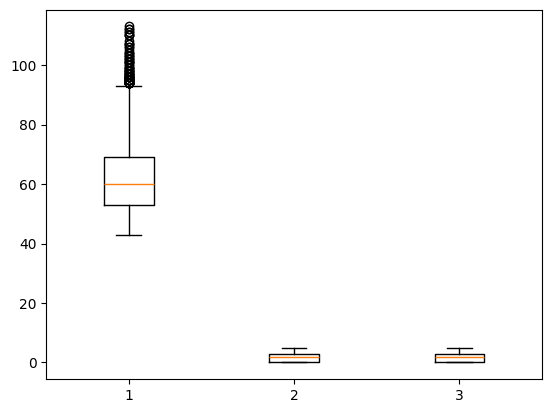

In [147]:
plt.boxplot(df[["Age","TotalChildren","TotalChildren"]])
plt.show()

C:\Users\Arunkumar\AppData\Local\Temp\ipykernel_57288\3186847657.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])
C:\Users\Arunkumar\AppData\Local\Temp\ipykernel_57288\3186847657.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["AnnualIncome"])
C:\Users\Arunkumar\AppData\Loca

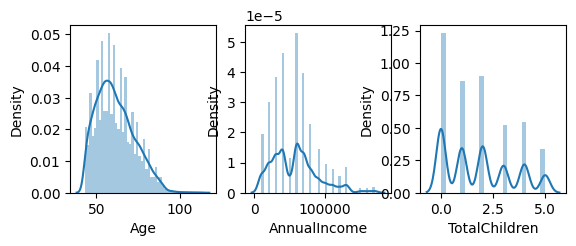

In [148]:
import seaborn as sns
plt.subplot(2,3,1)
sns.distplot(df["Age"])
plt.subplot(2,3,2)
sns.distplot(df["AnnualIncome"])
plt.subplot(2,3,3)
sns.distplot(df["TotalChildren"])
plt.show()

In [149]:
x=df["Age"].sort_values().quantile(0.25)
y=df["Age"].sort_values().quantile(0.75)
iqr=y-x
lwrlim=x-(iqr*1.5)
uprlim=y+(iqr*1.5)
newAge=df["Age"][(df["Age"]>lwrlim)&(df["Age"]<uprlim)]

In [150]:
#numerical_columns = df.select_dtypes(include=['number'])
numerical_columns = df.select_dtypes('number').columns
print(numerical_columns)

Index(['Age', 'AnnualIncome', 'TotalChildren'], dtype='object')


In [151]:
df.describe()

,BirthDate,Age,AnnualIncome,TotalChildren
count,18018,18018.000000,18018.000000,18018.000000
mean,1962-02-09 01:31:40.099900128,61.519703,57298.812299,1.841936
min,1910-08-13 00:00:00,43.000000,10000.000000,0.000000
25%,1954-09-22 06:00:00,53.000000,30000.000000,0.000000
50%,1963-08-21 12:00:00,60.000000,60000.000000,2.000000
75%,1970-09-22 00:00:00,69.000000,70000.000000,3.000000
max,1980-12-26 00:00:00,113.000000,170000.000000,5.000000
std,NaN,11.243700,32231.947506,1.612789


In [152]:
for i in df.select_dtypes('number').columns:
        x=df[i].sort_values().quantile(0.25)
        y=df[i].sort_values().quantile(0.75)
        iqr=y-x
        lwrlim=x-(iqr*1.5)
        uprlim=y+(iqr*1.5)
        df=df[(df[i]>lwrlim)&(df[i]<uprlim)]

In [153]:
#exdf=df[~df["Age"].isin(newAge)]

In [154]:
#newdf=df[df["Age"].isin(newAge)]

In [155]:
df.describe()

,BirthDate,Age,AnnualIncome,TotalChildren
count,17142,17142.000000,17142.000000,17142.000000
mean,1962-07-22 04:37:02.751137568,61.073037,53532.843309,1.822424
min,1931-04-02 00:00:00,43.000000,10000.000000,0.000000
25%,1955-03-26 00:00:00,53.000000,30000.000000,0.000000
50%,1964-02-17 12:00:00,60.000000,60000.000000,2.000000
75%,1971-02-11 00:00:00,68.000000,70000.000000,3.000000
max,1980-12-26 00:00:00,92.000000,120000.000000,5.000000
std,NaN,10.977132,27083.127052,1.617164


{'whiskers': [<matplotlib.lines.Line2D at 0x1bbfb6ab4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbfb6aa2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbfb534a10>],
 'medians': [<matplotlib.lines.Line2D at 0x1bbfb6a9090>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bbfb6a8750>],
 'means': []}

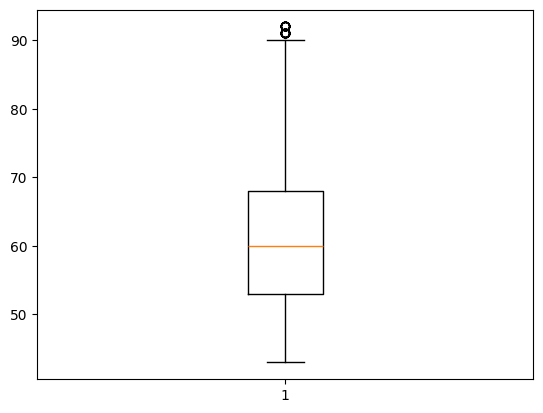

In [156]:
plt.boxplot(df["Age"])

<Axes: xlabel='AnnualIncome', ylabel='Age'>

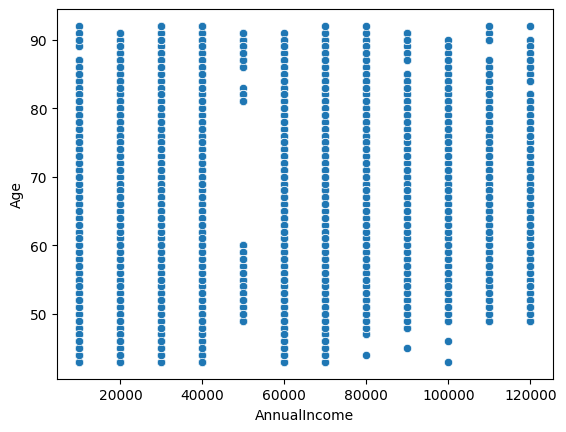

In [157]:
sns.scatterplot(x=df["AnnualIncome"],y=df["Age"])

In [158]:
df

,BirthDate,Age,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,1966-08-04,57,M,M,90000.0,2,Bachelors,Professional,Y
1,1965-05-14,58,S,M,60000.0,3,Bachelors,Professional,N
2,1965-12-08,58,M,M,60000.0,3,Bachelors,Professional,Y
3,1968-02-15,56,S,F,70000.0,0,Bachelors,Professional,N
4,1968-08-08,55,S,F,80000.0,5,Bachelors,Professional,Y
...,...,...,...,...,...,...,...,...,...
18143,1958-04-07,65,M,M,30000.0,1,Graduate Degree,Clerical,Y
18144,1960-10-11,63,S,F,30000.0,3,Graduate Degree,Clerical,Y
18145,1960-05-01,63,S,M,30000.0,3,Graduate Degree,Clerical,N
18146,1959-05-03,64,M,M,30000.0,3,Bachelors,Clerical,Y


<Axes: xlabel='Gender', ylabel='count'>

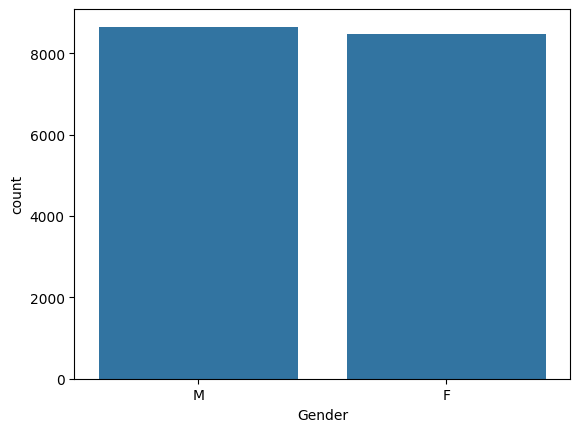

In [159]:
sns.countplot(x=df["Gender"])

<Axes: xlabel='Gender', ylabel='count'>

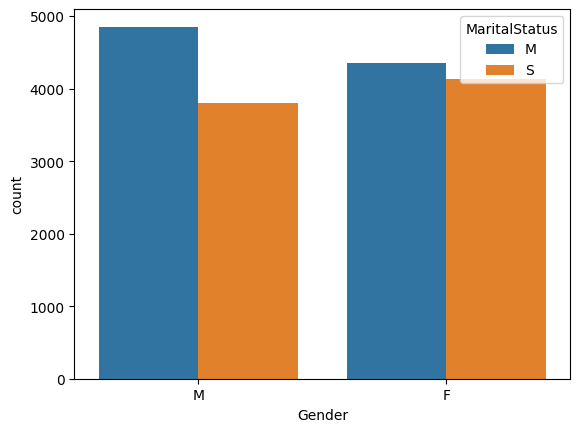

In [160]:
sns.countplot(x=df["Gender"],hue=df["MaritalStatus"])

In [161]:
from pydantic_settings import BaseSettings

In [162]:
df.groupby(['HomeOwner',"Occupation"]).size().reset_index(name="count")

,HomeOwner,Occupation,count
0,N,Clerical,914
1,N,Management,563
2,N,Manual,1079
3,N,Professional,1659
4,N,Skilled Manual,1241
5,Y,Clerical,1895
6,Y,Management,1889
7,Y,Manual,1224
8,Y,Professional,3463
9,Y,Skilled Manual,3215


In [163]:
df.groupby(['HomeOwner',"Occupation","EducationLevel"]).agg({"AnnualIncome":"mean"})

AnnualIncome
HomeOwner Occupation     EducationLevel                    
N         Clerical       Bachelors             28430.232558
                         Graduate Degree       31818.181818
                         High School           30000.000000
                         Partial College       32032.710280
                         Partial High School   28066.037736
          Management     Bachelors             80254.777070
                         Graduate Degree       83430.232558
                         High School          100677.966102
                         Partial College      111176.470588
                         Partial High School  120000.000000
          Manual         Bachelors             10000.000000
                         Graduate Degree       12307.692308
                         High School           20000.000000
                         Partial College       16845.425868
                         Partial High School   16786.885246
          Professional   Bachelors             66505.102041
                         Graduate Degree       64391.534392
                         High School           58776.978417
                         Partial College       74379.947230
                         Partial High School  111724.137931
          Skilled Manual Bachelors             56993.865031
                         Graduate Degree       60320.512821
                         High School           38238.482385
                         Partial College       55740.318907
                         Partial High School   67543.859649
Y         Clerical       Bachelors             27649.572650
                         Graduate Degree       31653.116531
                         High School           30000.000000
                         Partial College       35902.688860
                         Partial High School   20382.978723
          Management     Bachelors             78164.493480
                         Graduate Degree       77465.857360
                         High School           99111.111111
                         Partial College      107659.574468
                         Partial High School  116666.666667
          Manual         Bachelors             11194.029851
                         Graduate Degree       11063.829787
                         High School           17056.074766
                         Partial College       15693.430657
                         Partial High School   13247.232472
          Professional   Bachelors             69462.264151
                         Graduate Degree       66605.222734
                         High School           68756.302521
                         Partial College       77500.000000
                         Partial High School  112235.294118
          Skilled Manual Bachelors             47662.337662
                         Graduate Degree       56964.912281
                         High School           37675.507020
                         Partial College       58630.952381
                         Partial High School   65291.666667

<Axes: xlabel='Occupation', ylabel='count'>

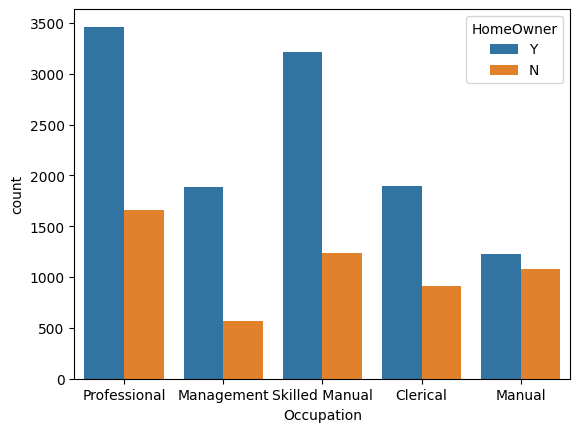

In [164]:
sns.countplot(data=df, x='Occupation', hue='HomeOwner')

In [165]:
mat = df[["Age","TotalChildren","TotalChildren"]].corr()

In [166]:
mat['Age']['TotalChildren']

TotalChildren    0.530989
TotalChildren    0.530989
Name: Age, dtype: float64

In [170]:
mat=df.select_dtypes('number').corr()

In [171]:
mat

,Age,AnnualIncome,TotalChildren
Age,1.000000,0.144558,0.530989
AnnualIncome,0.144558,1.000000,0.240941
TotalChildren,0.530989,0.240941,1.000000


In [172]:
for i in df.select_dtypes('number').columns:
    for j in df.select_dtypes('number').columns:
        if mat[i][j]>0.95 and i!=j:
            print(j)

In [173]:
df

,BirthDate,Age,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,1966-08-04,57,M,M,90000.0,2,Bachelors,Professional,Y
1,1965-05-14,58,S,M,60000.0,3,Bachelors,Professional,N
2,1965-12-08,58,M,M,60000.0,3,Bachelors,Professional,Y
3,1968-02-15,56,S,F,70000.0,0,Bachelors,Professional,N
4,1968-08-08,55,S,F,80000.0,5,Bachelors,Professional,Y
...,...,...,...,...,...,...,...,...,...
18143,1958-04-07,65,M,M,30000.0,1,Graduate Degree,Clerical,Y
18144,1960-10-11,63,S,F,30000.0,3,Graduate Degree,Clerical,Y
18145,1960-05-01,63,S,M,30000.0,3,Graduate Degree,Clerical,N
18146,1959-05-03,64,M,M,30000.0,3,Bachelors,Clerical,Y


In [109]:
from scipy.stats import f_oneway

# Assuming 'numerical_column' is your numerical column and 'categorical_column' is your categorical column
category_groups = [df[df['HomeOwner'] == category]['Age'] for category in df['HomeOwner'].unique()]
f_statistic, p_value = f_oneway(*category_groups)


In [110]:
f_statistic

297.36086729360994

In [111]:
p_value

4.4690119778119054e-66

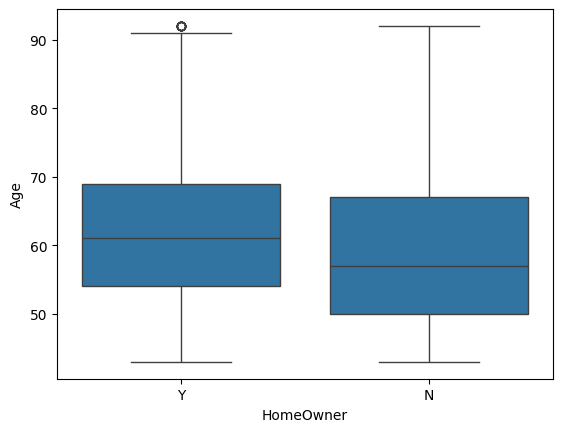

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'numerical_column' is your numerical column and 'categorical_column' is your categorical column
sns.boxplot(data=df, x='HomeOwner', y='Age')
plt.show()


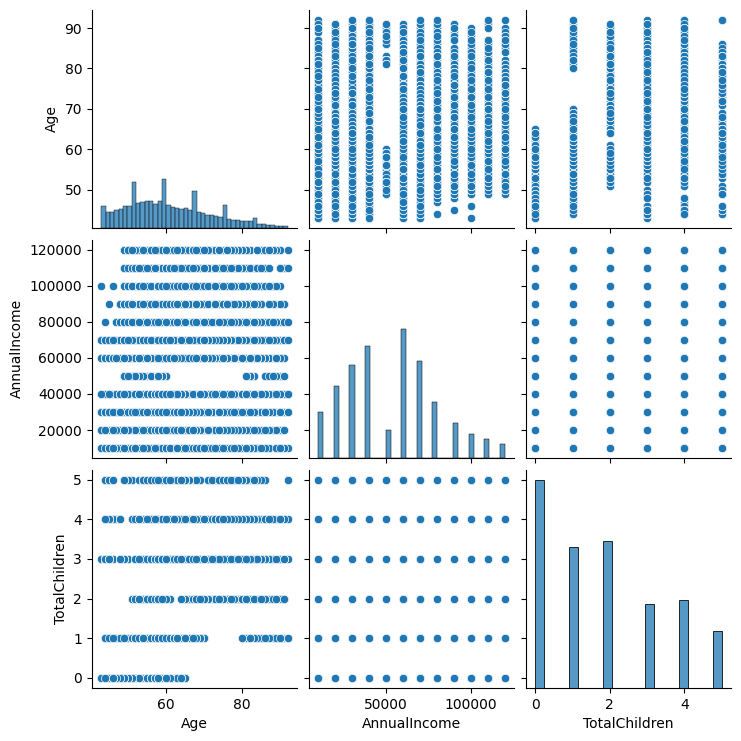

In [113]:
sns.pairplot(df)

In [174]:
df

,BirthDate,Age,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,1966-08-04,57,M,M,90000.0,2,Bachelors,Professional,Y
1,1965-05-14,58,S,M,60000.0,3,Bachelors,Professional,N
2,1965-12-08,58,M,M,60000.0,3,Bachelors,Professional,Y
3,1968-02-15,56,S,F,70000.0,0,Bachelors,Professional,N
4,1968-08-08,55,S,F,80000.0,5,Bachelors,Professional,Y
...,...,...,...,...,...,...,...,...,...
18143,1958-04-07,65,M,M,30000.0,1,Graduate Degree,Clerical,Y
18144,1960-10-11,63,S,F,30000.0,3,Graduate Degree,Clerical,Y
18145,1960-05-01,63,S,M,30000.0,3,Graduate Degree,Clerical,N
18146,1959-05-03,64,M,M,30000.0,3,Bachelors,Clerical,Y


In [262]:
df.isnull().sum()

BirthDate         0
Age               0
MaritalStatus     0
Gender            0
AnnualIncome      0
TotalChildren     0
EducationLevel    0
Occupation        0
HomeOwner         0
dtype: int64

In [308]:
numerical_columns = df.select_dtypes(include=['number']).columns.to_list()
categorical_columns = df.select_dtypes(exclude=['number']).columns.to_list()

In [326]:
categorical_columns

['BirthDate',
 'MaritalStatus',
 'Gender',
 'EducationLevel',
 'Occupation',
 'HomeOwner']

In [352]:
df_categorical=pd.DataFrame(df[categorical_columns], columns=categorical_columns)

In [353]:
df_categorical=pd.get_dummies(df,columns=["MaritalStatus","Gender","Occupation"])

In [354]:
df_categorical["EducationLevel"].unique()

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [355]:
education_level={'Partial High School':0,'High School':1,'Partial College':2,'Bachelors':3,'Graduate Degree':4}

In [356]:
df_categorical["EducationLevel"]=df_categorical["EducationLevel"].map(education_level)

In [357]:
df_categorical = pd.concat([df_categorical.drop(columns="HomeOwner"), df_categorical["HomeOwner"]], axis=1)

In [358]:
df_categorical

,BirthDate,Age,AnnualIncome,TotalChildren,EducationLevel,MaritalStatus_M,MaritalStatus_S,Gender_F,Gender_M,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,HomeOwner
0,1966-08-04,57,90000.0,2,3,True,False,False,True,False,False,False,True,False,Y
1,1965-05-14,58,60000.0,3,3,False,True,False,True,False,False,False,True,False,N
2,1965-12-08,58,60000.0,3,3,True,False,False,True,False,False,False,True,False,Y
3,1968-02-15,56,70000.0,0,3,False,True,True,False,False,False,False,True,False,N
4,1968-08-08,55,80000.0,5,3,False,True,True,False,False,False,False,True,False,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,1958-04-07,65,30000.0,1,4,True,False,False,True,True,False,False,False,False,Y
18144,1960-10-11,63,30000.0,3,4,False,True,True,False,True,False,False,False,False,Y
18145,1960-05-01,63,30000.0,3,4,False,True,False,True,True,False,False,False,False,N
18146,1959-05-03,64,30000.0,3,3,True,False,False,True,True,False,False,False,False,Y


In [359]:
scaler = StandardScaler()
df_scaled_numerical = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)

In [360]:
new_df = pd.concat([df_scaled_numerical, df_categorical], axis=1)

In [361]:
new_df.shape

(18101, 18)

In [362]:
new_df.dropna(inplace=True)

In [363]:
new_df.drop("BirthDate",axis=1,inplace=True)

In [364]:
new_df.shape

(16183, 17)

In [365]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_df.iloc[:,:-1],new_df["HomeOwner"],test_size=0.2,random_state=4)

In [347]:
x_train

,Age,AnnualIncome,TotalChildren,Age,AnnualIncome,TotalChildren,EducationLevel,HomeOwner,MaritalStatus_M,MaritalStatus_S,Gender_F,Gender_M,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional
8266,-0.826564,1.715774,-1.126959,53.0,30000.0,0.0,3.0,Y,False,True,False,True,True,False,False,False
6156,-1.008766,-0.130448,-0.508575,65.0,60000.0,1.0,3.0,Y,False,True,True,False,False,False,False,True
3768,0.813256,0.977285,1.346579,49.0,20000.0,0.0,0.0,Y,False,True,True,False,False,False,True,False
14395,0.631054,0.977285,0.109810,45.0,30000.0,4.0,2.0,Y,True,False,False,True,True,False,False,False
1949,-0.188856,0.977285,-1.126959,65.0,80000.0,5.0,4.0,Y,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,-0.553261,-0.499693,-1.126959,81.0,60000.0,3.0,4.0,Y,False,True,False,True,False,True,False,False
753,-0.735463,0.608040,0.728195,50.0,50000.0,0.0,4.0,N,False,True,False,True,False,False,False,False
11340,0.539953,-0.499693,-0.508575,66.0,10000.0,1.0,2.0,Y,False,True,True,False,False,False,True,False
8899,-0.735463,0.608040,1.346579,57.0,60000.0,0.0,4.0,Y,True,False,True,False,False,False,False,False


In [380]:
from sklearn.linear_model import LogisticRegression,LinearRegression
clf = LogisticRegression()

In [367]:
clf.fit(x_train,y_train)

C:\Users\Arunkumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [368]:
clf.predict(x_test)

array(['N', 'Y', 'Y', ..., 'N', 'N', 'Y'], dtype=object)

In [369]:
y_pred=clf.predict(x_test)

In [370]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6947791164658634

In [393]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LogisticRegression()
sel=EFS(lr,scoring="accuracy",min_features=10,max_features=11,cv=5,print_progress=True,n_jobs=-1)

In [396]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
lr=LogisticRegression(max_iter=1000)
sfs=SFS(lr,k_features="best",forward=False,floating=False,scoring="accuracy",cv=5)
sfs.fit(x_train,y_train)

C:\Users\Arunkumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Arunkumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Arunkumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATI

SequentialFeatureSelector(estimator=LogisticRegression(), forward=False,
                          k_features=(1, 16), scoring='accuracy')

In [398]:
sfs.feature_names

['Age',
 'AnnualIncome',
 'TotalChildren',
 'Age',
 'AnnualIncome',
 'TotalChildren',
 'EducationLevel',
 'MaritalStatus_M',
 'MaritalStatus_S',
 'Gender_F',
 'Gender_M',
 'Occupation_Clerical',
 'Occupation_Management',
 'Occupation_Manual',
 'Occupation_Professional',
 'Occupation_Skilled Manual']

In [403]:
new_df.columns

Index(['Age', 'AnnualIncome', 'TotalChildren', 'Age', 'AnnualIncome',
       'TotalChildren', 'EducationLevel', 'MaritalStatus_M', 'MaritalStatus_S',
       'Gender_F', 'Gender_M', 'Occupation_Clerical', 'Occupation_Management',
       'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'HomeOwner'],
      dtype='object')

In [378]:
y_train.shape

(12946,)

In [394]:
best=sel.fit(x_train,y_train)

KeyboardInterrupt: 

In [389]:
best.best_score_

0.6948864441332575

In [390]:
best.best_feature_names_

('Age',)